In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\amazonReview1.xlsx")
data.head()

,Reviewer name,reviews of the product,Review body,rating of the product,sentiment
0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,CHETAN SHETTER,Never Expected in this price range I Assure Yo...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rocking",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,Raj Patel,Maybe buy boat basshead,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive


In [3]:
data.shape

(449779, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449779 entries, 0 to 449778
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Reviewer name           449766 non-null  object
 1   reviews of the product  449718 non-null  object
 2   Review body             449622 non-null  object
 3   rating of the product   413373 non-null  object
 4   sentiment               449779 non-null  object
dtypes: object(5)
memory usage: 17.2+ MB


In [5]:
data.isnull().sum()

Reviewer name                13
reviews of the product       61
Review body                 157
rating of the product     36406
sentiment                     0
dtype: int64

# Removing Null values

In [6]:
data['Reviewer name']=data['Reviewer name'].fillna(data['Reviewer name'].mode()[0])
data['reviews of the product']=data['reviews of the product'].fillna(data['reviews of the product'].mode()[0])
data['Review body']=data['Review body'].fillna(data['Review body'].mode()[0])
data['rating of the product']=data['rating of the product'].fillna(data['rating of the product'].mode()[0])


In [7]:
data.isnull().sum()

Reviewer name             0
reviews of the product    0
Review body               0
rating of the product     0
sentiment                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449779 entries, 0 to 449778
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Reviewer name           449779 non-null  object
 1   reviews of the product  449779 non-null  object
 2   Review body             449779 non-null  object
 3   rating of the product   449779 non-null  object
 4   sentiment               449779 non-null  object
dtypes: object(5)
memory usage: 17.2+ MB


# DATA ENCODING

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
label=le.fit_transform(data["rating of the product"])
label
data=data.drop("rating of the product",axis='columns')
data["rating of the product"]=label

In [11]:
data

,Reviewer name,reviews of the product,Review body,sentiment,rating of the product
0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,positive,4
1,CHETAN SHETTER,Never Expected in this price range I Assure Yo...,I've been using this from past 6 months. This ...,positive,4
2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rocking",Perfect bass and nice one. Superb sound and it...,positive,4
3,Raj Patel,Maybe buy boat basshead,Here is the review after 1 week of usePros:1.B...,positive,3
4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,positive,4
...,...,...,...,...,...
449774,Dipchand,Not good,One side head phone is not working within 10 d...,negative,0
449775,Amazon Customer,Need replacement,Quality is good. And there is some damage near...,negative,0
449776,MAYANK MISHRA,Stopped working after 1 month.,Your browser does not support HTML5 video. Â A...,negative,2
449777,Zan,Cheap Quality.,This product is of very cheap quality. Wouldn'...,negative,0


In [12]:
data.drop(['Reviewer name'],axis=1,inplace=True)

In [13]:
data

,reviews of the product,Review body,sentiment,rating of the product
0,Pros and cons,Great quality and the sound is actually great....,positive,4
1,Never Expected in this price range I Assure Yo...,I've been using this from past 6 months. This ...,positive,4
2,"Bass bastler, Awesome HD quality sound, rocking",Perfect bass and nice one. Superb sound and it...,positive,4
3,Maybe buy boat basshead,Here is the review after 1 week of usePros:1.B...,positive,3
4,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,positive,4
...,...,...,...,...
449774,Not good,One side head phone is not working within 10 d...,negative,0
449775,Need replacement,Quality is good. And there is some damage near...,negative,0
449776,Stopped working after 1 month.,Your browser does not support HTML5 video. Â A...,negative,2
449777,Cheap Quality.,This product is of very cheap quality. Wouldn'...,negative,0


In [14]:
le=LabelEncoder()
label=le.fit_transform(data["sentiment"])
label
data=data.drop("sentiment",axis='columns')
data["sentiment"]=label
data

,reviews of the product,Review body,rating of the product,sentiment
0,Pros and cons,Great quality and the sound is actually great....,4,1
1,Never Expected in this price range I Assure Yo...,I've been using this from past 6 months. This ...,4,1
2,"Bass bastler, Awesome HD quality sound, rocking",Perfect bass and nice one. Superb sound and it...,4,1
3,Maybe buy boat basshead,Here is the review after 1 week of usePros:1.B...,3,1
4,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,4,1
...,...,...,...,...
449774,Not good,One side head phone is not working within 10 d...,0,0
449775,Need replacement,Quality is good. And there is some damage near...,0,0
449776,Stopped working after 1 month.,Your browser does not support HTML5 video. Â A...,2,0
449777,Cheap Quality.,This product is of very cheap quality. Wouldn'...,0,0


In [15]:
data.drop(['Review body'],axis=1,inplace=True)

In [16]:
data

,reviews of the product,rating of the product,sentiment
0,Pros and cons,4,1
1,Never Expected in this price range I Assure Yo...,4,1
2,"Bass bastler, Awesome HD quality sound, rocking",4,1
3,Maybe buy boat basshead,3,1
4,Superb head stereo better than leading brands.,4,1
...,...,...,...
449774,Not good,0,0
449775,Need replacement,0,0
449776,Stopped working after 1 month.,2,0
449777,Cheap Quality.,0,0


In [17]:
data['reviews of the product'].unique()


array(['Pros and cons',
       'Never Expected in this price range I Assure You Will Fall In Love With These Earphones',
       'Bass bastler, Awesome HD quality sound, rocking', ...,
       'Stopped working after 1 month.', 'Cheap Quality.',
       'First few days only it works'], dtype=object)

In [18]:
# Convert all messages to lower case
data['reviews of the product'] = data['reviews of the product'].str.lower()

# Replace email addresses with 'email'
data['reviews of the product'] = data['reviews of the product'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['reviews of the product'] = data['reviews of the product'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['reviews of the product'] = data['reviews of the product'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['reviews of the product'] = data['reviews of the product'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['reviews of the product'] = data['reviews of the product'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [19]:
le=LabelEncoder()
label=le.fit_transform(data["reviews of the product"])
label
data=data.drop("reviews of the product",axis='columns')
data["reviews of the product"]=label
data

,rating of the product,sentiment,reviews of the product
0,4,1,130346
1,4,1,102375
2,4,1,14460
3,3,1,96747
4,4,1,149079
...,...,...,...
449774,0,0,110952
449775,0,0,101961
449776,2,0,145825
449777,0,0,35541


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449779 entries, 0 to 449778
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   rating of the product   449779 non-null  int32
 1   sentiment               449779 non-null  int32
 2   reviews of the product  449779 non-null  int32
dtypes: int32(3)
memory usage: 5.1 MB


In [21]:
data.isnull().sum()

rating of the product     0
sentiment                 0
reviews of the product    0
dtype: int64

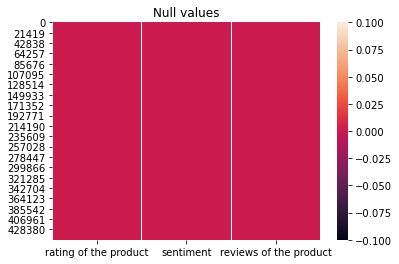

In [22]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [23]:
data.describe()

,rating of the product,sentiment,reviews of the product
count,449779.000000,449779.000000,449779.000000
mean,3.290294,0.851801,88234.401288
std,1.177584,0.355298,50706.045663
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,50934.000000
50%,4.000000,1.000000,80997.000000
75%,4.000000,1.000000,131478.500000
max,4.000000,1.000000,178494.000000


In [24]:
data.corr()

,rating of the product,sentiment,reviews of the product
rating of the product,1.000000,0.877381,-0.074488
sentiment,0.877381,1.000000,-0.070817
reviews of the product,-0.074488,-0.070817,1.000000


<AxesSubplot:>

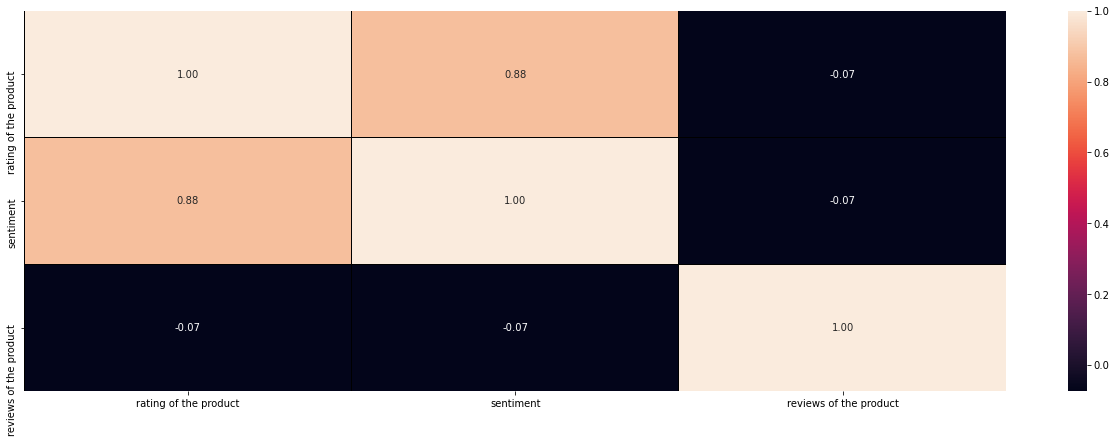

In [25]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [26]:
# checking the skewness for the features:
data.skew()

rating of the product    -1.831271
sentiment                -1.980322
reviews of the product    0.116532
dtype: float64

rating of the product        AxesSubplot(0.125,0.125;0.227941x0.755)
sentiment                 AxesSubplot(0.398529,0.125;0.227941x0.755)
reviews of the product    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

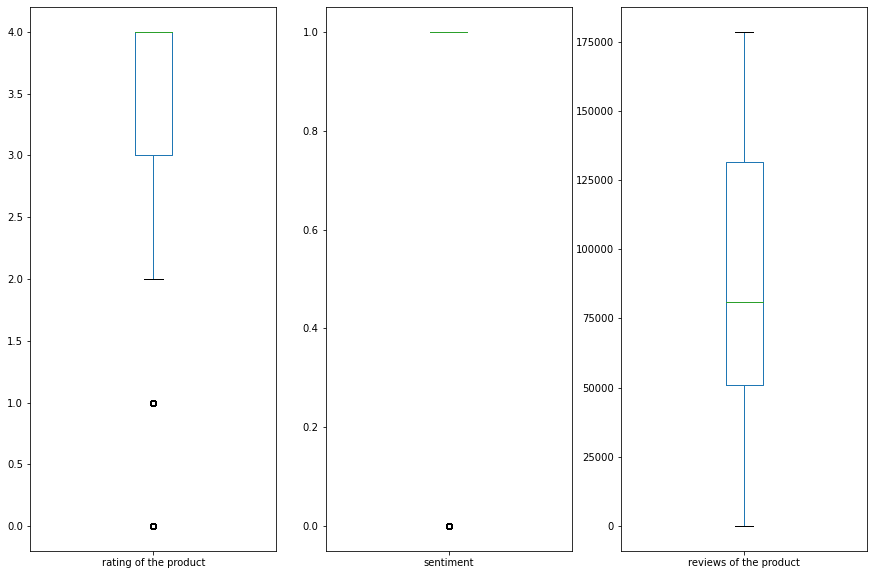

In [27]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(1,3),figsize = (15,10))

In [28]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[0.60268069 0.41711359 0.83050542]
 [0.60268069 0.41711359 0.27887433]
 [0.60268069 0.41711359 1.45494452]
 ...
 [1.09571391 2.3974285  1.13577507]
 [2.79410851 2.3974285  1.03919482]
 [1.94491121 2.3974285  0.67629883]]


array([[<AxesSubplot:title={'center':'rating of the product'}>,
        <AxesSubplot:title={'center':'sentiment'}>,
        <AxesSubplot:title={'center':'reviews of the product'}>]],
      dtype=object)

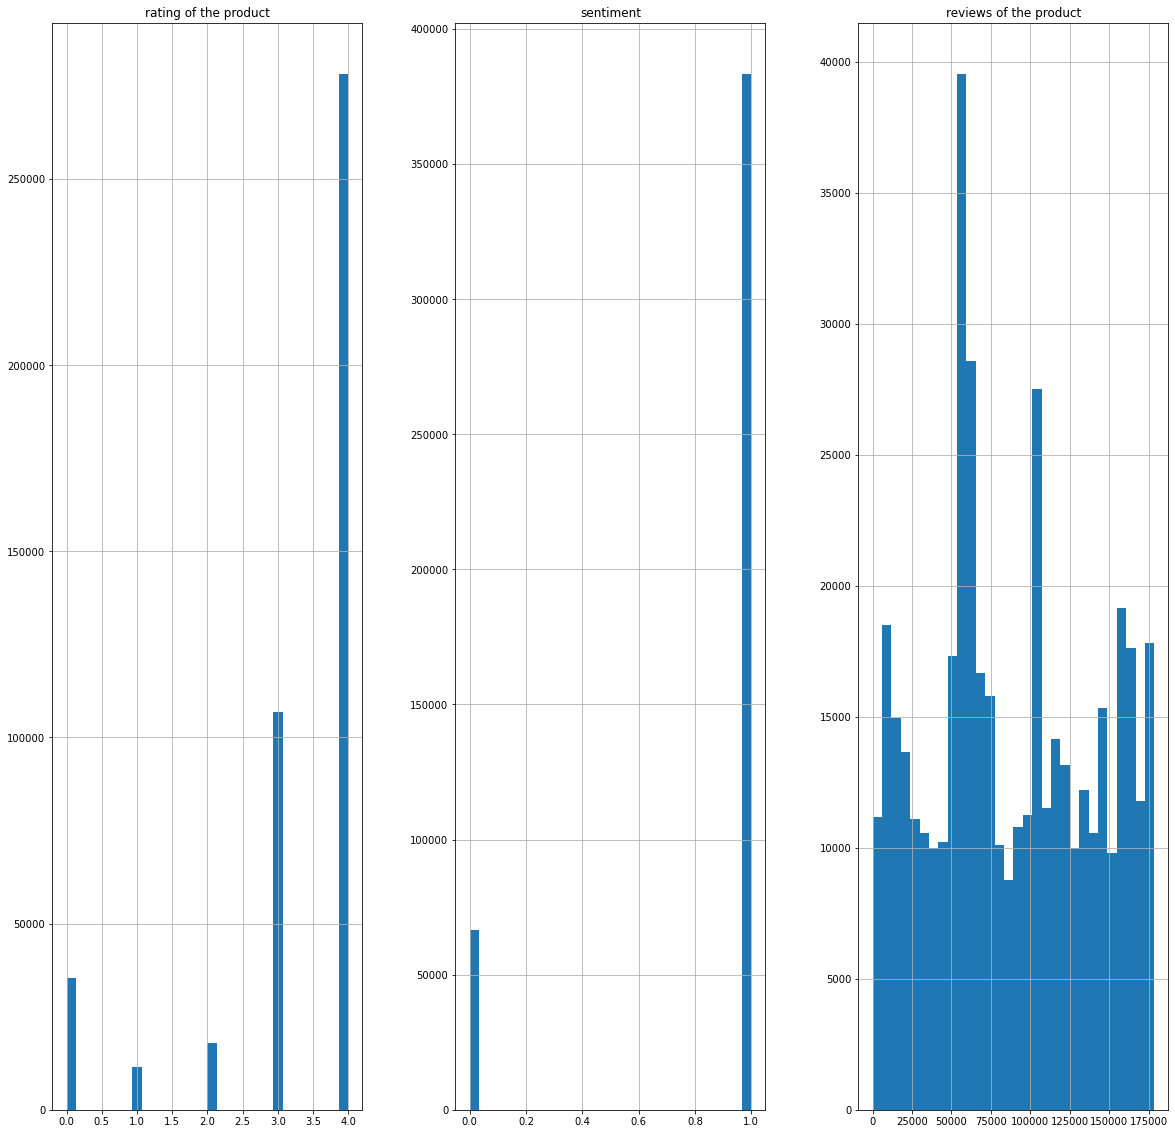

In [29]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (1,3), bins = 30)

In [30]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['rating of the product'])
y = data[["rating of the product"]]
print(x.shape)
print(y.shape)

(449779, 2)
(449779, 1)


In [31]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [32]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(1,50):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.24)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  1 is 0.7459957705355454
R2 score correspond to random state  1 is 0.5598293760838253
R2 score correspond to random state  1 is 0.7415233785597602
R2 score correspond to random state  1 is 0.7682332981886129
R2 score correspond to random state  1 is 0.7890053764958606
R2 score correspond to random state  2 is 0.7490767048414311
R2 score correspond to random state  2 is 0.5571270233152144
R2 score correspond to random state  2 is 0.7449502565091366
R2 score correspond to random state  2 is 0.7700078641642641
R2 score correspond to random state  2 is 0.7898222786625464
R2 score correspond to random state  3 is 0.7497766070649525
R2 score correspond to random state  3 is 0.5653350025200762
R2 score correspond to random state  3 is 0.7378306496300502
R2 score correspond to random state  3 is 0.7700552820114656
R2 score correspond to random state  3 is 0.7911580910225299
R2 score correspond to random state  4 is 0.7465563356235569
R2 score correspond to r

In [33]:
gbr = GradientBoostingRegressor()
gbr.fit(train_x,train_y)
pred = gbr.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 79.04797513814789


Text(0, 0.5, 'predicted_rating of the product')

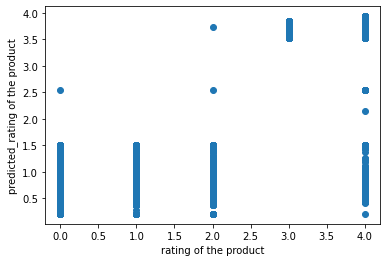

In [34]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('rating of the product')
plt.ylabel('predicted_rating of the product')

# saving model

In [35]:
import pickle

In [36]:
#saving model to the local file system
filename='Ratings Prediction.pickle'
pickle.dump(gbr,open(filename,'wb'))

In [37]:
filename

'Ratings Prediction.pickle'

In [38]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.41711359,  0.83050542],
       [ 0.41711359,  0.27887433],
       [ 0.41711359, -1.45494452],
       ...,
       [-2.3974285 ,  1.13577507],
       [-2.3974285 , -1.03919482],
       [-2.3974285 , -0.67629883]])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.24,random_state=44)

In [40]:
#lets predict data
y_pred=gbr.predict(x_test)
y_pred

array([0.98089807, 0.98089807, 0.98089807, ..., 0.98089807, 0.98089807,
       0.98089807])

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [42]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,30))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [43]:
from sklearn.metrics import r2_score

In [44]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.7730117946969384